# **Template Matching using OpenCV**

## Import Required Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Example #1: Matching Template in Input Image

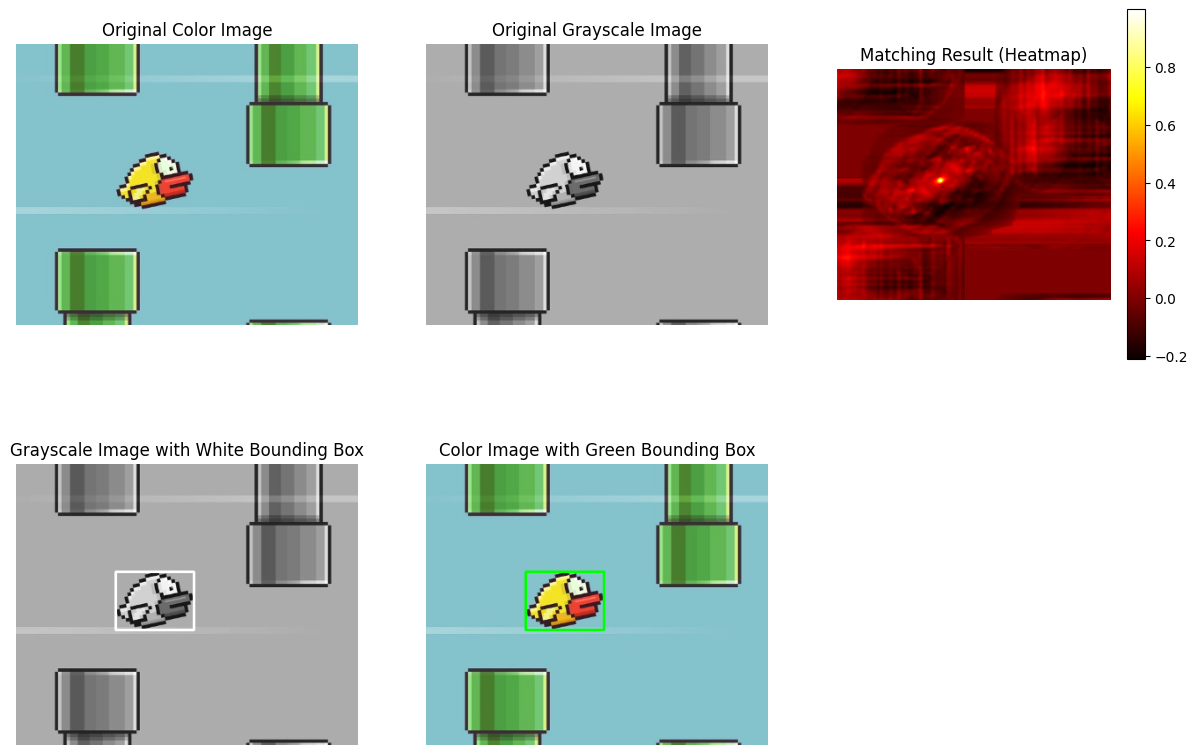

In [ ]:
# Load the original images in color and grayscale
color_image = cv2.imread('large_image.jpg')  # Load the main image in color
grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)  # Convert the color image to grayscale
template = cv2.imread('template_image.jpg', 0)  # Load the template image in grayscale

# Get the dimensions of the template
w, h = template.shape[::-1]

# Perform template matching using cv2.matchTemplate
result = cv2.matchTemplate(grayscale_image, template, cv2.TM_CCOEFF_NORMED)

# Find the best match location
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Top-left corner of the match
top_left = max_loc
# Bottom-right corner of the match
bottom_right = (top_left[0] + w, top_left[1] + h)

# Draw rectangles on both grayscale and color images
grayscale_with_bbox = grayscale_image.copy()
color_with_bbox = color_image.copy()

# Draw white bounding box on grayscale image
cv2.rectangle(grayscale_with_bbox, top_left, bottom_right, (255, 255, 255), 2)

# Draw green bounding box on color image
cv2.rectangle(color_with_bbox, top_left, bottom_right, (0, 255, 0), 2)

# Display the original and result images
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.title('Original Color Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Display the grayscale image with white bounding box
plt.subplot(2, 3, 4)
plt.imshow(grayscale_with_bbox, cmap='gray')
plt.title('Grayscale Image with White Bounding Box')
plt.axis('off')

# Display the color image with green bounding box
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(color_with_bbox, cv2.COLOR_BGR2RGB))
plt.title('Color Image with Green Bounding Box')
plt.axis('off')

# Display the matching result (heatmap of similarity scores)
plt.subplot(2, 3, 3)
plt.imshow(result, cmap='hot')
plt.title('Matching Result (Heatmap)')
plt.colorbar()
plt.axis('off')

plt.show()


## Example #2: Template Matching Methods

*   **cv2.TM_SQDIFF**: Squared difference.
*   **cv2.TM_SQDIFF_NORMED**: Normalized squared difference.
*   **cv2.TM_CCOEFF**: Correlation coefficient.
*   **cv2.TM_CCOEFF_NORMED**: Normalized correlation coefficient.
*   **cv2.TM_CCORR**: Cross-correlation.


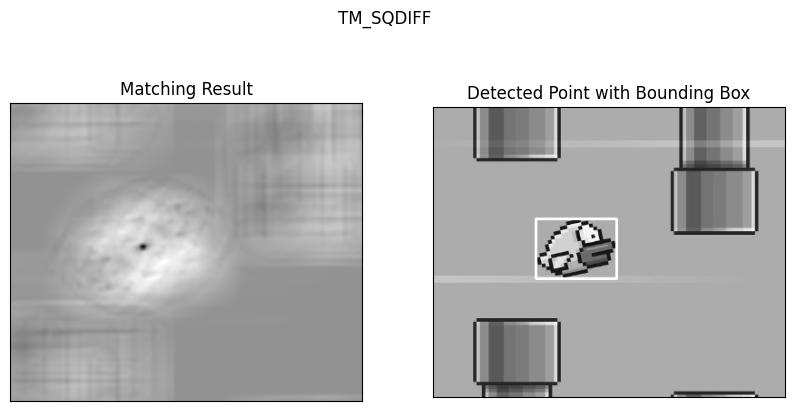

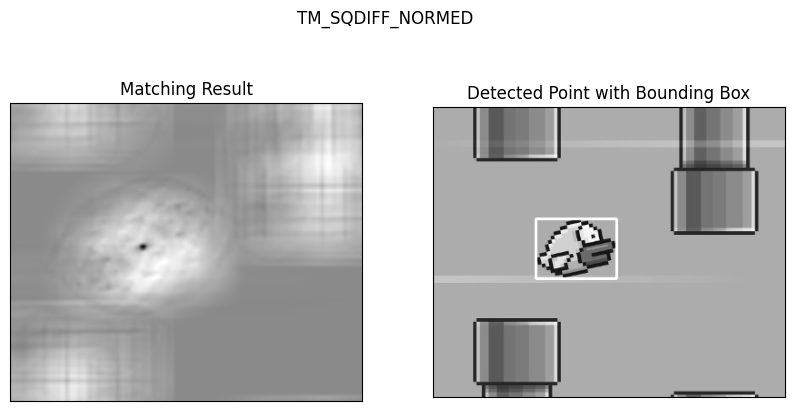

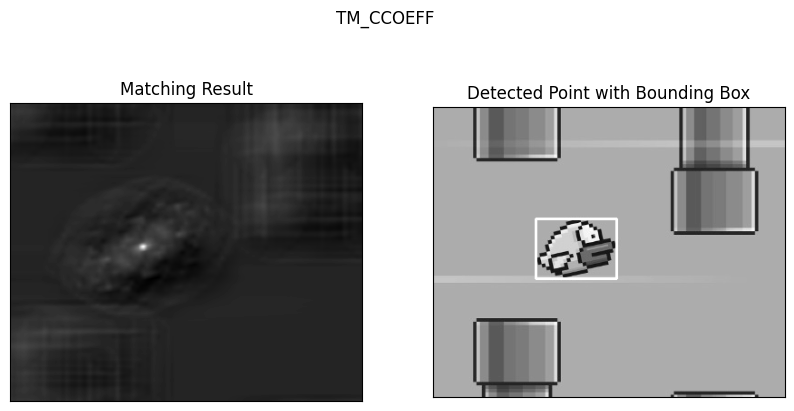

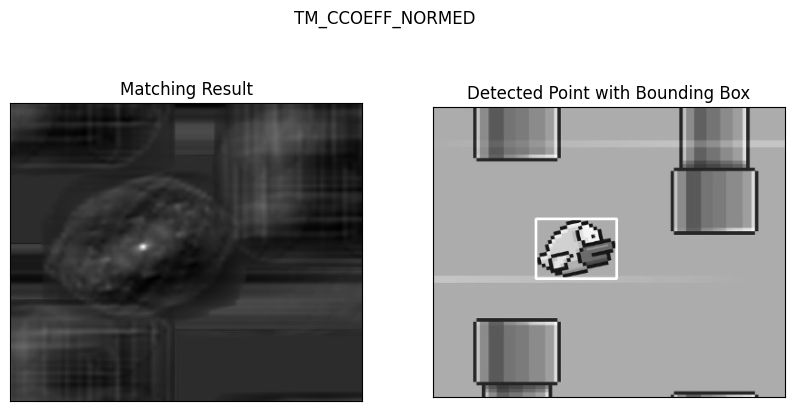

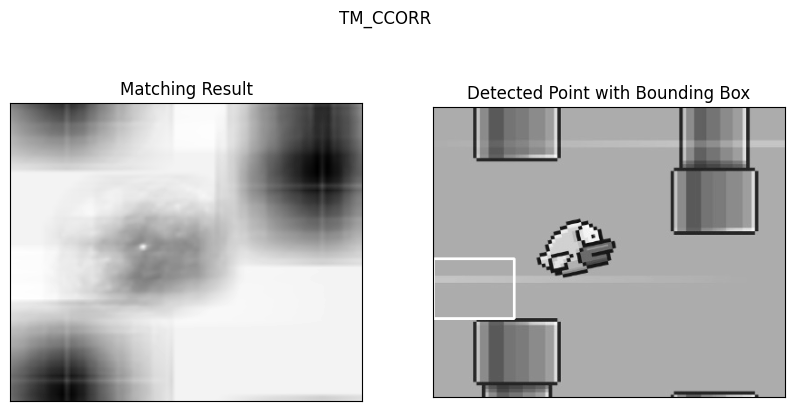

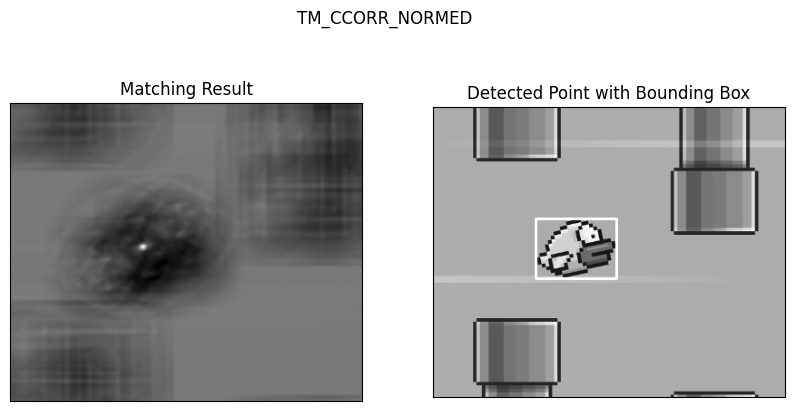

In [ ]:
img = cv2.imread('large_image.jpg', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv2.imread('template_image.jpg', cv2.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['TM_SQDIFF', 'TM_SQDIFF_NORMED', 'TM_CCOEFF',
           'TM_CCOEFF_NORMED', 'TM_CCORR',  'TM_CCORR_NORMED']

for m in methods:
    img = img2.copy()
    method = getattr(cv2, m)

    # Apply template Matching
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Draw rectangle around the detected template
    cv2.rectangle(img, top_left, bottom_right, 255, 2)

    # Plot the matching result and the detected point side by side
    plt.figure(figsize=(10, 5))  # Increase the figure size for better visibility
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(img, cmap='gray')
    plt.title('Detected Point with Bounding Box'), plt.xticks([]), plt.yticks([])

    plt.suptitle(m)
    plt.show()

## Example #3: Drawing Rectangle for best matched point in Result Matrix (R)

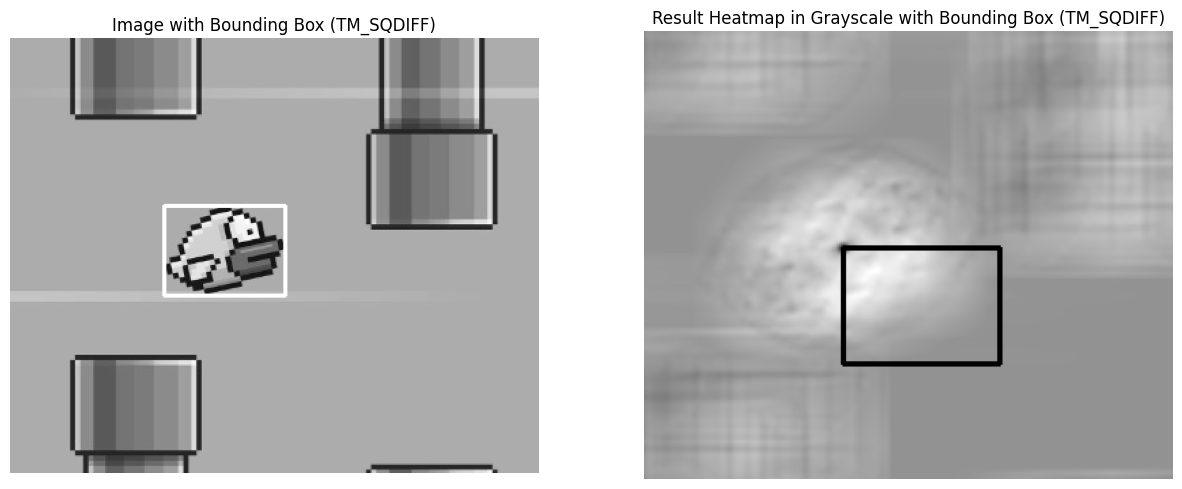

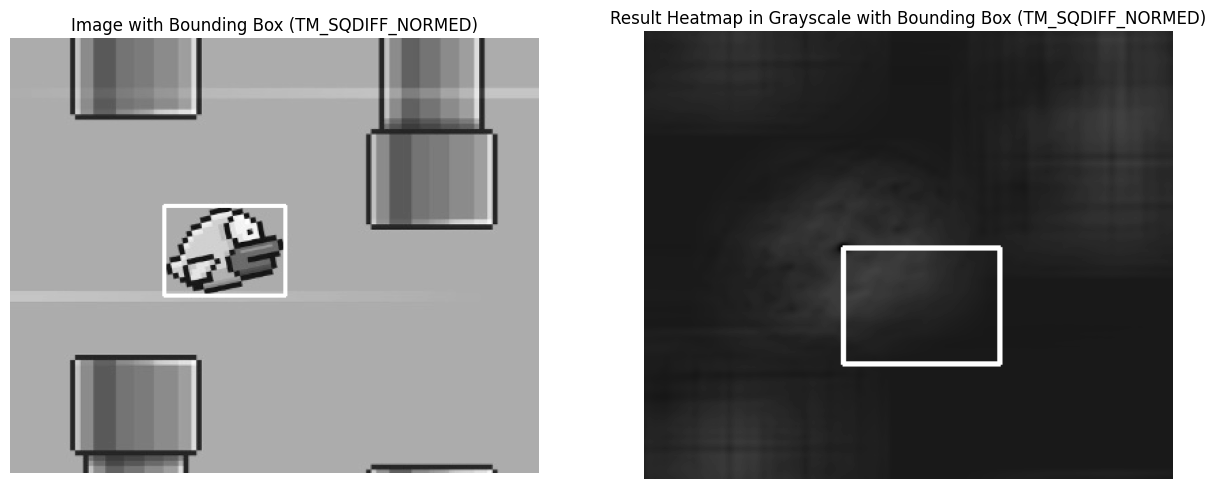

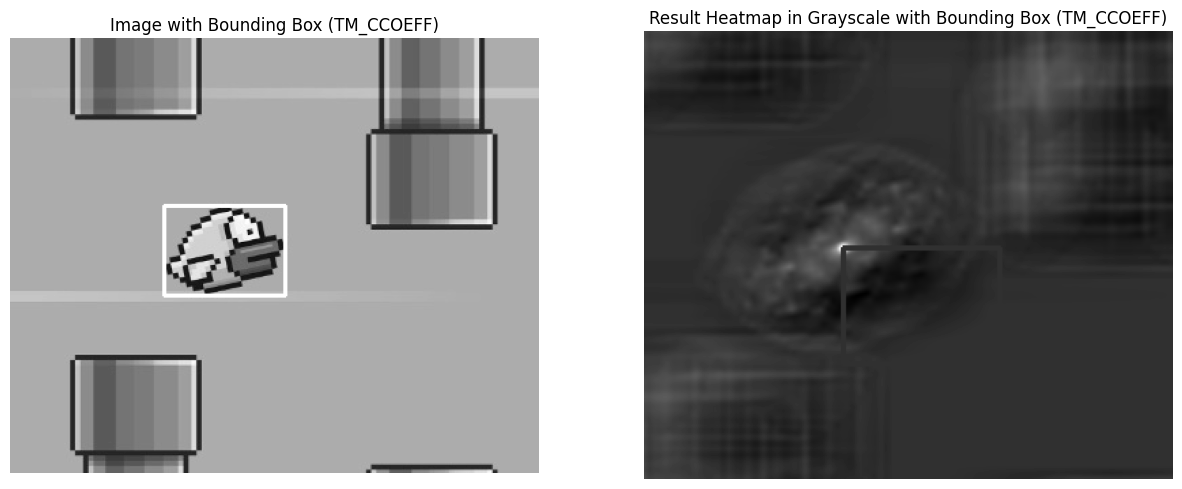

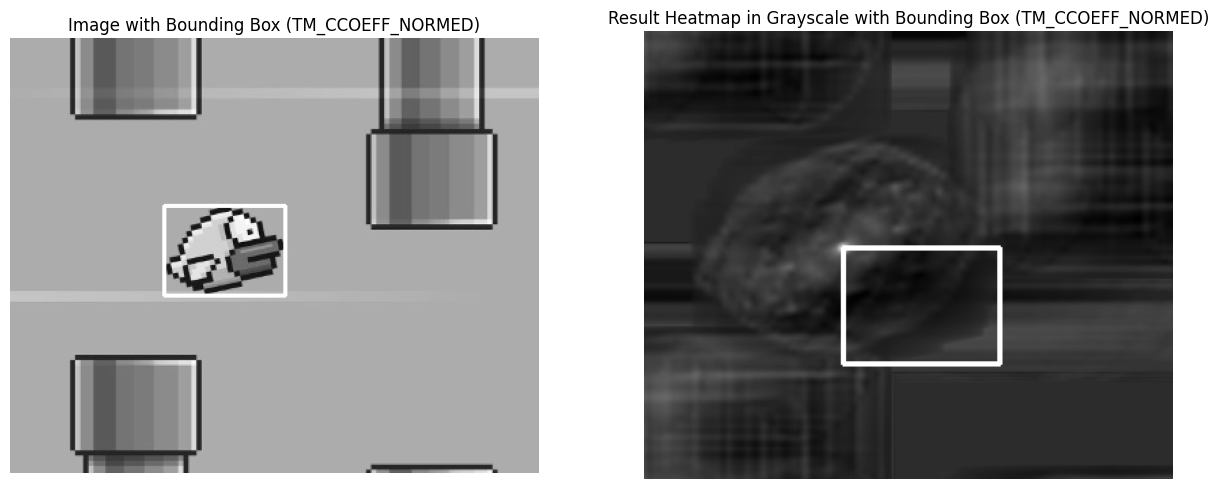

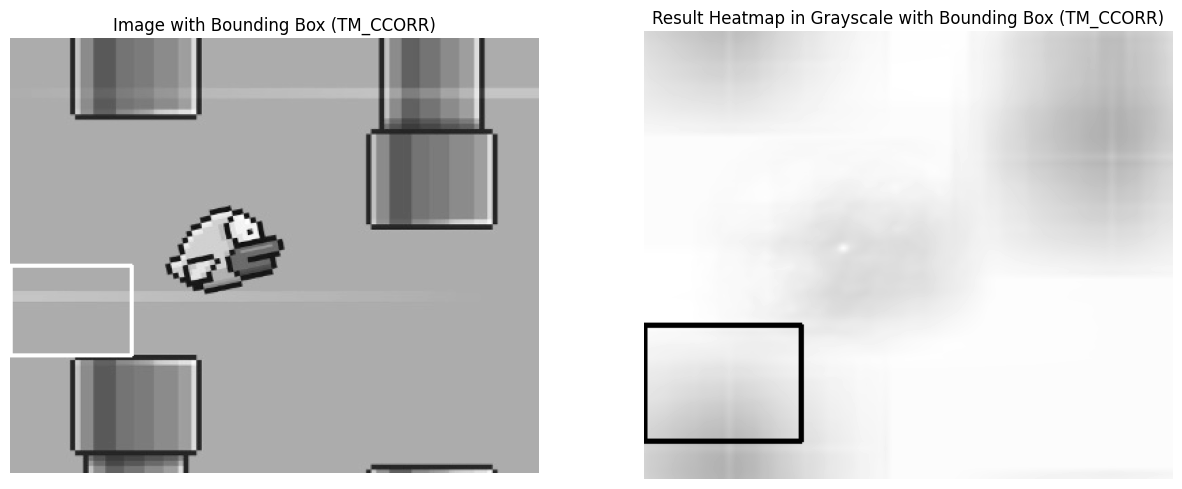

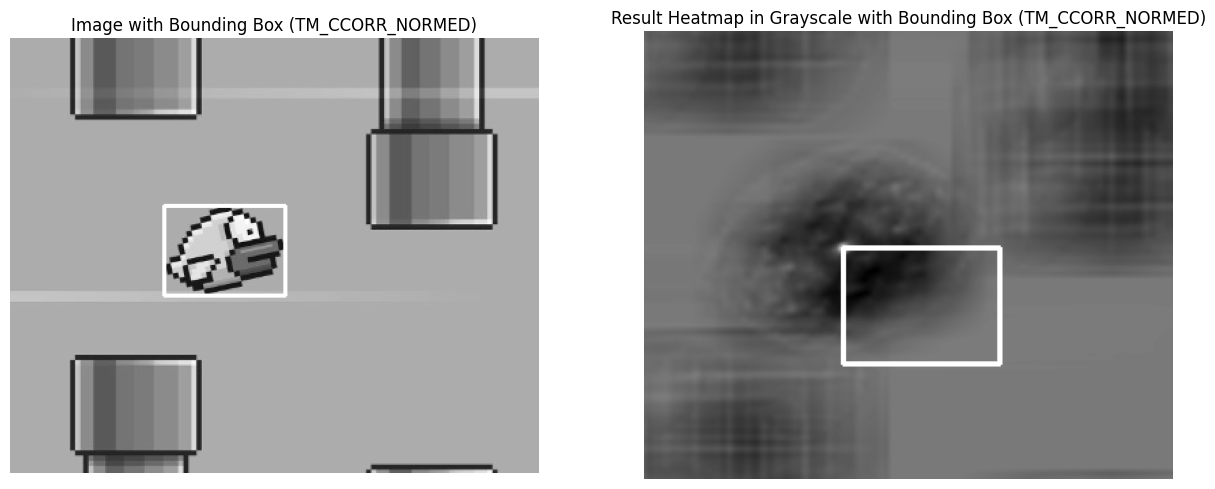

In [ ]:
# Load the original images in grayscale
img = cv2.imread('large_image.jpg', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv2.imread('template_image.jpg', cv2.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['TM_SQDIFF', 'TM_SQDIFF_NORMED', 'TM_CCOEFF',
           'TM_CCOEFF_NORMED', 'TM_CCORR',  'TM_CCORR_NORMED']

for m in methods:
    img = img2.copy()
    method = getattr(cv2, m)

    # Apply template matching
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Determine top-left corner for the bounding box
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc  # For these methods, a lower value is better
    else:
        top_left = max_loc  # For other methods, a higher value is better
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Draw a rectangle around the detected template in the original image
    cv2.rectangle(img, top_left, bottom_right, 255, 2)

    # Draw a rectangle in the result (grayscale) to visualize the matching location
    result_with_bbox = res.copy()
    cv2.rectangle(result_with_bbox, top_left, bottom_right, 1, 2)  # Bounding box in the result matrix

    # Plot the images
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Image with Bounding Box ({m})')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(result_with_bbox, cmap='gray')  # Show the result image as grayscale
    plt.title(f'Result Heatmap in Grayscale with Bounding Box ({m})')
    plt.axis('off')

    plt.show()

## Example #4: Matching Multiple Objects

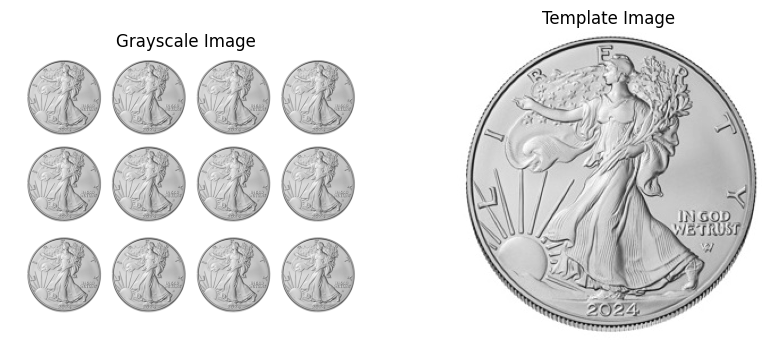

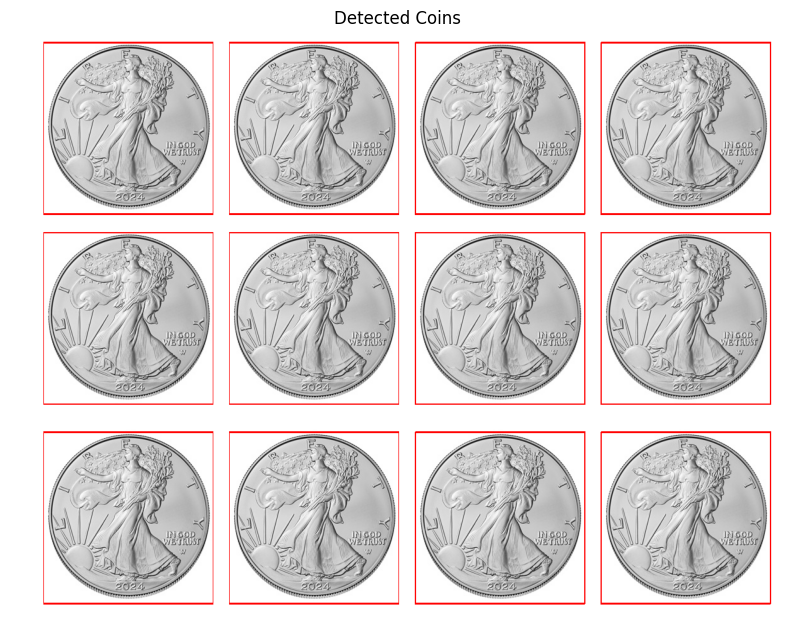

In [13]:
# Load the color and grayscale images
img_rgb = cv2.imread('coin_image.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('coin_template.jpg', cv2.IMREAD_GRAYSCALE)

# Get width and height of the template
w, h = template.shape[::-1]

# Perform template matching
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Apply a threshold to detect all occurrences
threshold = 0.8
loc = np.where(res >= threshold)

# Draw rectangles around all detected matches
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 1)

# Display the grayscale version of the original image and the template
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(template, cmap='gray')
plt.title('Template Image')
plt.axis('off')

plt.show()

# Display the result using matplotlib with detected matches
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.title('Detected Coins')
plt.axis('off')
plt.show()
